In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Creating arrays

In [26]:
a1 = np.array([3, 5, 7, 4])
a2 = np.zeros(10) # Array of 10 zeros
a3 = np.ones(10) # Array of 10 ones
a4 = np.random.random(10) # Uniform distribution
a5 = np.random.randn(10) # Normal distribution
a6 = np.linspace(0, 10, 100) # 100 values from 0 to 10
a7 = np.arange(0, 10, 0.02) # From 0 to 10 with step 0.02

### Array Operations

In [14]:
2*a1 # You can perform matematical operations with arrays

array([ 6, 10, 14,  8])

In [16]:
a1 > 4.5 # You can perform logical operations with arrays

array([False,  True,  True, False])

In [17]:
x = np.linspace(0, 1, 100)
y = x**2

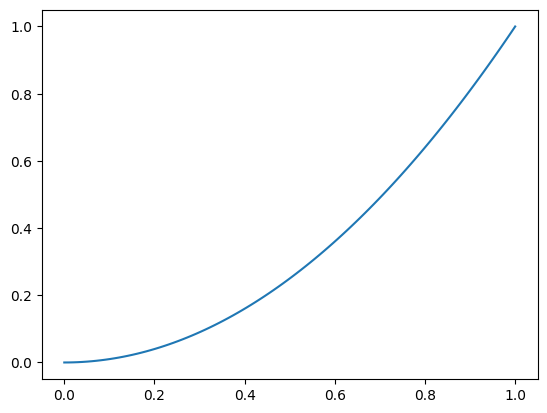

In [19]:
plt.plot(x, y)

(array([2., 0., 1., 0., 0., 0., 0., 1., 1., 5.]),
 array([0.075867  , 0.16152306, 0.24717912, 0.33283517, 0.41849123,
        0.50414729, 0.58980335, 0.67545941, 0.76111547, 0.84677153,
        0.93242759]),
 <BarContainer object of 10 artists>)

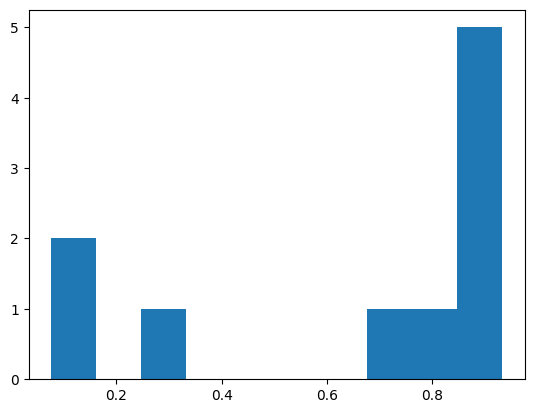

In [27]:
plt.hist(a4)

In [29]:
def f(x):
    return x**2 * np.sin(x) / np.exp(-x)

x = np.linspace(0, 10, 100)
y = f(x)

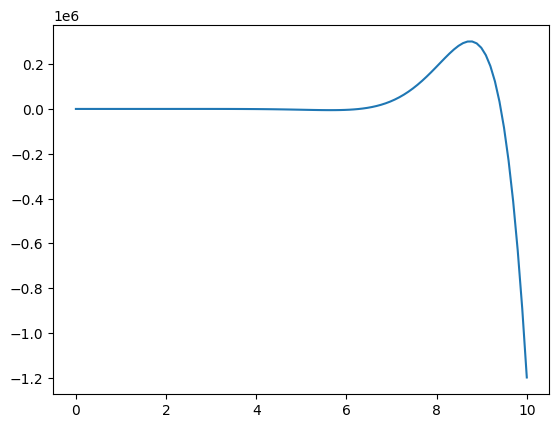

In [30]:
plt.plot(x, y)

List of mathematical operators:
https://numpy.org/doc/stable/reference/routines.math.html

### Array indexing and slicing

In [31]:
a1 = np.array([2, 4, 6, 8, 10])

In [36]:
a1[2:4]

array([6, 8])

In [39]:
a1[:-2]

array([2, 4, 6])

In [40]:
a1[::2]

array([ 2,  6, 10])

In [41]:
a1[1:-2]

array([4, 6])

In [42]:
a1[a1 > 5]

array([ 6,  8, 10])

In [43]:
names = np.array(['John', 'Paul', 'Josh', 'Ringo'])

In [46]:
first_letter_j = np.vectorize(lambda x: x[0])(names)=='J' # Takes argument x and returns x[0]
first_letter_j

array([ True, False,  True, False])

In [47]:
names[first_letter_j]

array(['John', 'Josh'], dtype='<U5')

In [45]:
np.vectorize(lambda x: x[0])(names)

array(['J', 'P', 'J', 'R'], dtype='<U1')

In [48]:
a1[a1%4 == 0]

array([4, 8])

### Calculus / Statistical Functions

In [49]:
a1 = 2*np.random.randn(10000) + 10

mean, standard deviation, and percentiles of arrays:

In [50]:
np.mean(a1)

10.00884622086458

In [51]:
np.std(a1)

1.9684477285003548

In [52]:
np.percentile(a1, 80) # Finds a number that 80% of the numbers are less than it

11.657563949966594

Integrals and derivatives

In [64]:
x = np.linspace(1, 10, 100)
y = 1/x**2 * np.sin(x)
dydx = np.gradient(y, x) # Derivative of y with respect to x
y_int = np.cumsum(y) * (x[1] - x[0]) # Integral of y with respect to x / Treat this '(x[1] - x[0])' as dx

In [65]:
np.cumsum([1, 2, 3, 4])

array([ 1,  3,  6, 10])

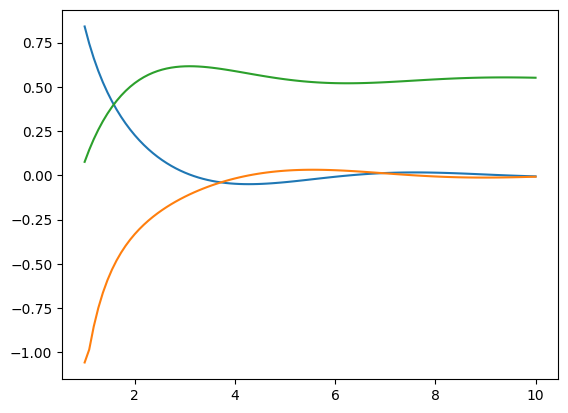

In [66]:
plt.plot(x, y)
plt.plot(x, dydx)
plt.plot(x, y_int)

### Question 1

Let y=e**(-x/10)*sin(x) Consider 10000 x intervals in the range [0, 10]

1. Plot the function y vs x in the range [0, 10]
2. Compute the mean and standard deviation of y for x values in [4, 7]
3. For x in the range [4, 7], find the value ym such that 80% of y values are less that ym
4. Plot dy/dx vs x
5. Find the locations where dy/dx = 0

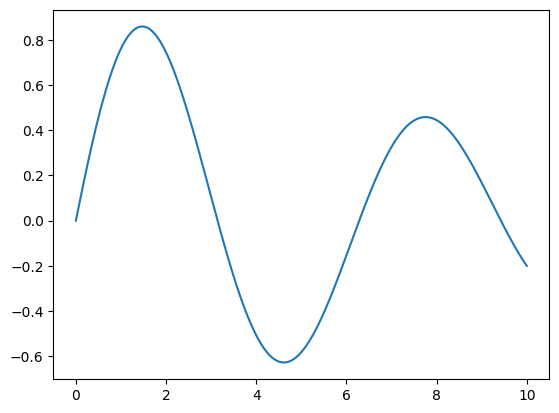

In [67]:
#1
N = 10000
x = np.linspace(0, 10, N+1)
y = np.exp(-x/10) * np.sin(x)
plt.plot(x, y)

In [69]:
#2
np.mean(y[(x>=4)*(x<=7)]) # This is will only return the values that satisfy both conditions

-0.2956023068963138

In [70]:
np.std(y[(x>=4)*(x<=7)])

0.31448753875085117

In [72]:
#3
np.percentile(y[(x>=4)*(x<=7)], 80)

0.06145551274590662

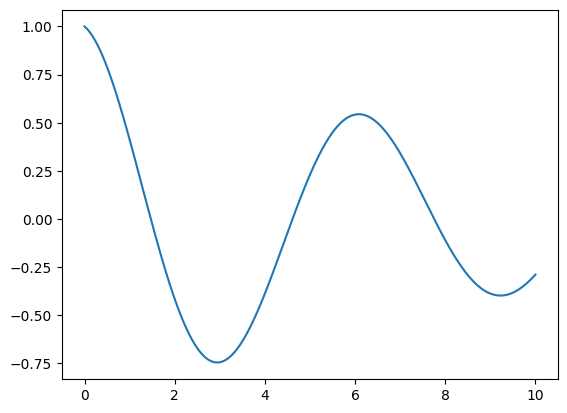

In [73]:
#4
plt.plot(x, np.gradient(y, x))

In [74]:
#5
dydx = np.gradient(y, x)

In [82]:
r"""
This code does something like this:
dydx = [-2, -1, 0, 1, 2]
dydx[1:] => [-1, 0, 1, 2] => Skips the first element
dydx[:-1] => [-2, -1, 0, 1] => Skips the last element

By multiplying + * + and - * - will result in a positive number
ONLY on the intersection between + and - will give you negative number

x[1:] is written instead of x because the first element of x is not included in dydx.
Otherwise it will result in an error.
"""

x[1:][dydx[1:] * dydx[:-1] < 0] # This will return True if the product is negative

array([1.472, 4.613, 7.755])

### Question 2
Sum together every number from 0 to 10000 except for those that can be divided by 4 or 7. Do this in one line of code.

In [95]:
nums = np.arange(0, 10001, 1)
(nums[(nums%4 != 0) * (nums%7 != 0)][:30])

array([ 1,  2,  3,  5,  6,  9, 10, 11, 13, 15, 17, 18, 19, 22, 23, 25, 26,
       27, 29, 30, 31, 33, 34, 37, 38, 39, 41, 43, 45, 46])

In [94]:
nums = np.arange(0, 10001, 1)
sum(nums[(nums%4 != 0) * (nums%7 != 0)])

32147142

### Question 3
Consider the flower petal r(theta) = 1 + 3/4*sin(3*theta) for 0 <= theta <= 2pi
1. Make a plot of the flower (find x and y points)
2. Compute the area using the calculus formula A = calc from 0 to 2pi * 1/2r**2*d*theta
3. Compute the arclength using the calculus formula L = calc from 0 to 2pi sqrt(r**2 + (dr/d*theta)**2 * d*theta)

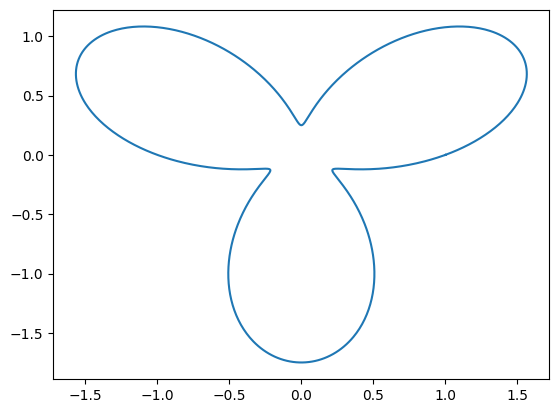

In [97]:
#1
theta = np.linspace(0, 2*np.pi, 1000)
r = 1 + 3/4 * np.sin(3*theta)
x = r * np.cos(theta)
y = r * np.sin(theta)
plt.plot(x, y)

In [100]:
#2 
A = 1/2 * sum(r**2) * (theta[1] - theta[0])
A

4.028310324802908

In [103]:
#3
sum(np.sqrt(r**2 + np.gradient(r, theta)**2)) * (theta[1] - theta[0])

11.640021569013872

### Question 4
The power emitted by a blackbody is: $$ P = (A \sigma \epsilon T^4) $$ After measuring the temperature of a star you find that:
$$ T(t) = T_0\frac{1}{1+e^{-kt}} $$ 
You can combine it like so:
$$ => P / (A \sigma \epsilon T_0) = \left( \frac{1}{1+e^{-kt}} \right)^4 $$

In [112]:
# You can only deal with dimensionless quantities

kt = np.linspace(0, 3, 100)
P = (1/(1+np.exp(-kt)))**4
E = np.cumsum(P) * (kt[1] - kt[0])

Text(0, 0.5, '$\\left(\\frac{k}{A \\sigma \\epsilon T_0}\\right) E(kt)$')

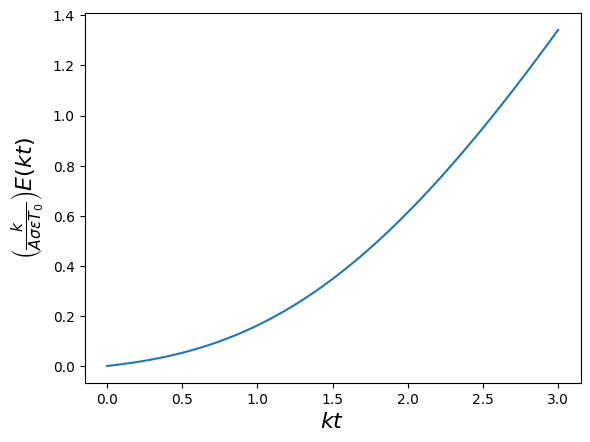

In [113]:
plt.plot(kt, E)
plt.xlabel('$kt$', fontsize=16)
plt.ylabel(r'$\left(\frac{k}{A \sigma \epsilon T_0}\right) E(kt)$', fontsize=16)

### Multi-dimensional Arrays

Creating multi-dimensional arrays

In [4]:
a1 = np.array([[4, 6, 4],
               [1, 2, 2],
               [6, 8, 7]])

Operations work in a similar way

In [5]:
2/a1

array([[0.5       , 0.33333333, 0.5       ],
       [2.        , 1.        , 1.        ],
       [0.33333333, 0.25      , 0.28571429]])

Can turn any n-dimensional array to 1d array using ravel() method

In [6]:
a1.ravel()

array([4, 6, 4, 1, 2, 2, 6, 8, 7])

Boolean indexing

In [7]:
a1>5

array([[False,  True, False],
       [False, False, False],
       [ True,  True,  True]])

In [8]:
a2 = np.random.randn(3, 3) # 3x3 matrix with random numbers

In [9]:
a2[a1>5]

array([ 1.72185967, -0.48284677, -0.69350937,  0.09681584])

In [10]:
a1

array([[4, 6, 4],
       [1, 2, 2],
       [6, 8, 7]])

In [11]:
a1[:,0] # Go across all rows and take the first element

array([4, 1, 6])

In [12]:
a1[1:,1]

array([2, 8])

In [14]:
a1[1:,:2]

array([[1, 2],
       [6, 8]])

### Dealing with 2D functions

Function in 2 dimensions. Try this...

In [135]:
x = np.linspace(0, 10, 1000)
y = np.linspace(0, 5, 500)

In [137]:
# This will create an error because the dimensions are different
# z = x**2 + y**2

Need to use meshgrids

In [138]:
xv, yv = np.meshgrid(x, y)

In [139]:
xv

array([[ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       ...,
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ]])

In [140]:
zv = xv**2 + yv**2

In [141]:
zv

array([[0.00000000e+00, 1.00200300e-04, 4.00801202e-04, ...,
        9.96000004e+01, 9.97999000e+01, 1.00000000e+02],
       [1.00401203e-04, 2.00601504e-04, 5.01202405e-04, ...,
        9.96001008e+01, 9.98000004e+01, 1.00000100e+02],
       [4.01604813e-04, 5.01805113e-04, 8.02406014e-04, ...,
        9.96004020e+01, 9.98003016e+01, 1.00000402e+02],
       ...,
       [2.48000008e+01, 2.48001010e+01, 2.48004016e+01, ...,
        1.24400001e+02, 1.24599901e+02, 1.24800001e+02],
       [2.48999000e+01, 2.49000002e+01, 2.49003008e+01, ...,
        1.24499900e+02, 1.24699800e+02, 1.24899900e+02],
       [2.50000000e+01, 2.50001002e+01, 2.50004008e+01, ...,
        1.24600000e+02, 1.24799900e+02, 1.25000000e+02]])

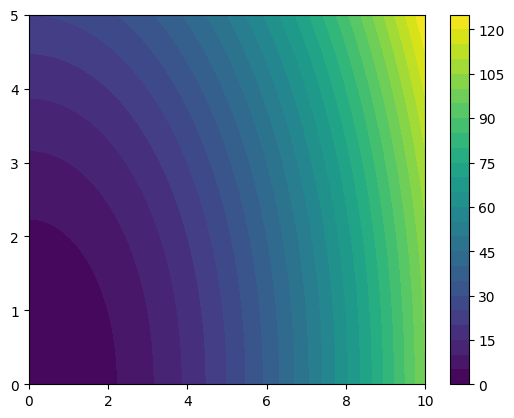

In [144]:
plt.contourf(xv, yv, zv, levels=30)
plt.colorbar()

### Basic Linear Algebra

Matrix Operations

In [146]:
A = np.array([[3, 2, 1],
              [5,-5, 4],
              [6, 0, 1]])
b1 = np.array([1, 2, 3])
b2 = np.array([-1,2,-5])              

In [147]:
A@b1 # Matrix times a vector

array([10,  7,  9])

In [148]:
A.T # Flips rows and columns

array([[ 3,  5,  6],
       [ 2, -5,  0],
       [ 1,  4,  1]])

In [149]:
np.dot(b1, b2)

-12

In [150]:
np.cross(b1, b2)

array([-16,   2,   4])

Systems of equations

$$ 3x + 2y = z $$
$$ 5x -5y +4z = 3 $$
$$ 6x + z = 0 $$

In [153]:
A = np.array([[3, 2, 1],
              [5,-5, 4],
              [6, 0, 1]])
C = np.array([4, 3, 0])

In [154]:
np.linalg.solve(A, C)

array([-0.49056604,  1.26415094,  2.94339623])

Finding Eigenvalues

In [155]:
A = np.array([[4, 2, 2],
              [2, 4, 2],
              [2, 2, 4]])

In [157]:
w, v = np.linalg.eig(A)

In [159]:
v # Actually the columns are the eigenvectors

array([[-0.81649658,  0.57735027, -0.32444284],
       [ 0.40824829,  0.57735027, -0.48666426],
       [ 0.40824829,  0.57735027,  0.81110711]])

In [160]:
v1 = v[:,0]
v1

array([-0.81649658,  0.40824829,  0.40824829])

In [161]:
A@v1

array([-1.63299316,  0.81649658,  0.81649658])

In [162]:
w[0]*v1

array([-1.63299316,  0.81649658,  0.81649658])

### Question 1
let $$ f(x, y) = e^{x^2+y^2} * sin(x) $$ for $$ -2 <= x <= 2 and -2 <= y <= 2 $$
1. Make a contour plot of f.
2. Find the volume |f(x, y)| in the specified x and y range.
3. Find the volume |f(x, y)| only in the region where $$ \sqrt{(x^2 + y^2)} > 0.5 $$

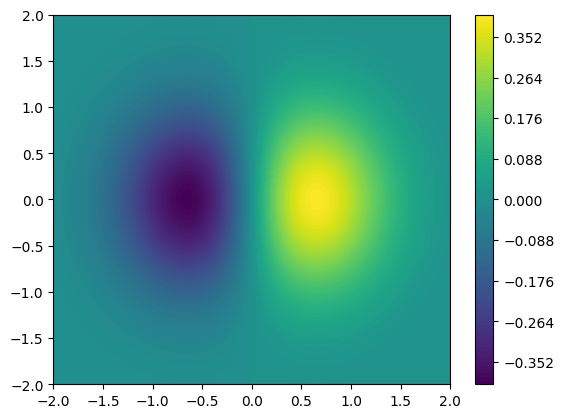

In [164]:
#1
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
xv, yv = np.meshgrid(x, y)
f = np.exp(-xv**2 - yv**2) * np.sin(xv)
plt.contourf(xv, yv, f, levels=100)
plt.colorbar()

In [175]:
#2
np.abs(f.ravel()).sum() * np.diff(x)[0] * np.diff(y)[0]

1.4861858145124311

In [176]:
#3
f[xv**2 + yv**2 > 0.5**2]

array([-0.00030504, -0.00031052, -0.00031609, ...,  0.00031609,
        0.00031052,  0.00030504])

In [177]:
np.abs(f[xv**2 + yv**2 > 0.5**2].ravel()).sum() * np.diff(x)[0] * np.diff(y)[0]

1.3447652930203164

### Question 2
After examining a circuit full of rezistors, you find that the voltage at 4 specified points is given by:
$$ 3V_1 + 2V_2 + 3V_3 + 10V_4 = 4$$
$$ 2V_1 - 2V_2 + 5V_3 + 8V_4 = 1$$
$$ 3V_1 + 3V_2 + 4V_3 + 9V_4 = 3$$
$$ 3V_1 + 4V_2 - 3V_3 - 7V_4 = 2$$
Find all the voltages.

In [180]:
A = np.array([[3, 2, 3, 10],
              [2,-2, 5, 8],
              [3, 3, 4, 9],
              [3, 4,-3,-7]])
C = np.array([4, 1, 3, 2])
np.linalg.solve(A, C)

array([ 0.78378378,  0.03603604, -0.67567568,  0.36036036])

### Question 3
An electric field is given by $ \vec{E}(z, t) = E_0 \cos(z-t) \hat{x} + 2E_0 \cos(z-t+\pi/2) \hat{y} $
1. Find the magnetic field for all $z \in [0, 4\pi]$ and $t \in [0, 10]$ using $ \vec{B}(z, t) = \hat{z} \times \vec{E}(z, t)$
2. Compute the Poynting vector $\vec{S} = \vec{E} \times \vec{B}$ for all $z$ and $t$

In [4]:
#1
z = np.linspace(0, 4*np.pi, 100)
t = np.linspace(0, 10, 100)

tv, zv = np.meshgrid(t, z)

Ex = np.cos(zv-tv)
Ey = 2*np.cos(zv-tv + np.pi/2)
Ez = 0*tv

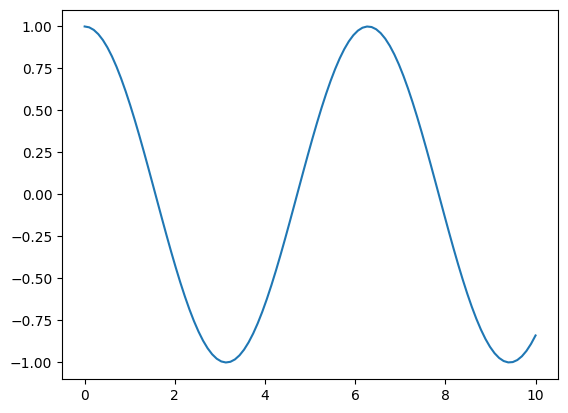

In [5]:
plt.plot(t, Ex[0])

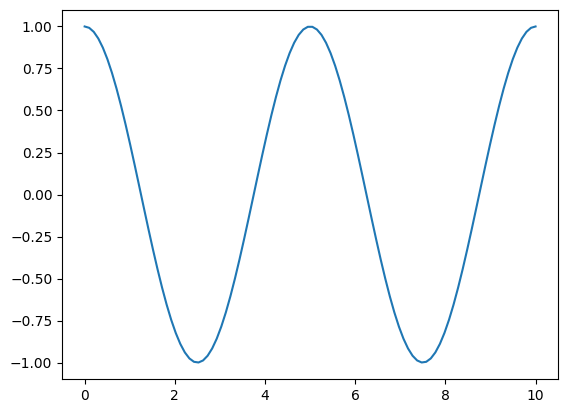

In [7]:
plt.plot(t, Ex[:,0])

In [20]:
E = np.array([Ex, Ey, Ez])
E = np.swapaxes(E, 0, -1) # Swap that results in having each row as a vector of E

In [21]:
B = np.cross(np.array([0, 0, 1]), E)

In [25]:
B = np.swapaxes(B, 0, -1)

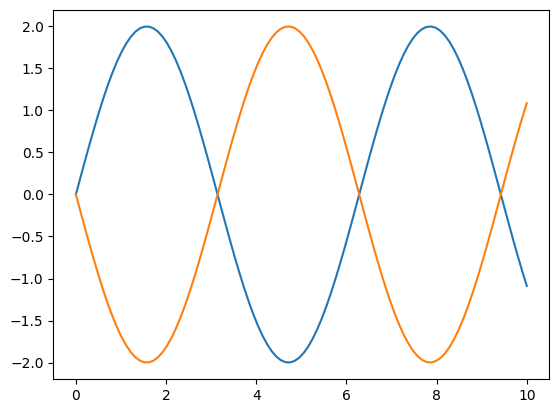

In [23]:
Bx, By, Bz = B
plt.plot(t, Ey[0])
plt.plot(t, Bx[0])

In [26]:
#3
S = np.cross(E, B)

In [28]:
S = np.swapaxes(S, 0, -1)

In [29]:
Sx, Sy, Sz = S

In [30]:
Sx

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])